![Simulation and Statistical Inference Project cover](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large)


*Image source: [link](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large).*


# Simulation and Statistical Inference Project

This notebook contains four simulation-based problems for the assessment.  
The goal is to use Python (NumPy, SciPy, Matplotlib) to explore some ideas in statistical inference using simulation.

### Lady Tasting Tea — Introduction

In this section, we look at the classic *Lady Tasting Tea* experiment described by Ronald Fisher.

The story is loosely based on a real event. Muriel Bristol, a colleague of Fisher, claimed that she could tell whether milk had been poured into a cup **before** or **after** the tea. Her future husband, William Roach, suggested setting up a simple experiment: give her eight cups of tea, four prepared milk-first and four prepared tea-first, in random order. She would then try to identify which cups were made by each method.

The question Fisher asked was:  
**If she were only guessing, what is the probability she would get her selections correct just by chance?**

In the actual experiment, Muriel Bristol correctly identified all four milk-first cups.

Fisher’s analysis of this test is famous because it was the first time he formally introduced the idea of a **null hypothesis**.  
The null hypothesis (or null model) represents a version of the world where the effect we are testing is set to zero. In this case:

- **Null hypothesis:** Muriel Bristol cannot truly distinguish between milk-first and tea-first cups and is choosing cups randomly.

In Fisher’s setup, there are eight cups in total — four milk-first and four tea-first — and the participant tries to pick the four milk-first cups. Under the null hypothesis, all selections are random, and we can calculate or simulate the probability of getting all four correct by chance.

In this project, we recreate this experiment using Python and simulation to estimate that probability and compare it with the exact combinatorial value.

For a clear description of the original experiment, see the Wikipedia article:  
https://en.wikipedia.org/wiki/Lady_tasting_tea

https://en.wikipedia.org/wiki/Ronald_Fisher


## Problem 1 — Extending the Lady Tasting Tea

In this problem I extend Fisher's Lady Tasting Tea experiment.  
First I look at the original version with 8 cups (4 milk-first, 4 tea-first), and then I change it to 12 cups (4 milk-first, 8 tea-first).

The idea is:
- calculate the exact probability by combinatorics (using `math.comb`),
- then approximate the same probability using simulation with NumPy,
- and finally compare the probabilities and talk about p-values and significance.

Some references I used while studying this problem:

- Explanation of Fisher's tea experiment: <https://lisds.github.io/textbook/wild-pandas/fishers_tea.html>  
- Tea-tasting analysis and code ideas: <https://github.com/e10v/tea-tasting>  
- `math.comb` documentation: <https://docs.python.org/3/library/math.html#math.comb>


https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

https://github.com/e10v/tea-tasting

https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

https://e10v.me/tea-tasting-analysis-of-experiments/

https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html




https://docs.python.org/3/library/math.html#math.comb

In [83]:
# Imports for Problem 1

import math              # for combinations like C(n, k)
import numpy as np       # for simulation
import matplotlib.pyplot as plt  # for plots
import ipywidgets as widgets
from IPython.display import display






In the original *Lady Tasting Tea* experiment:

- There are **8 cups** of tea: **4 prepared with milk poured first** and **4 with tea poured first**.  
- The lady’s task is to **correctly identify the 4 cups with milk poured first**.  
- If she is **just guessing randomly**, there are  
  \[
  C(8, 4) = 70
  \]
  possible ways to choose 4 cups out of 8.  

This means that, by chance alone, the probability of her selecting all four correct cups is  
\[
\frac{1}{70} \approx 0.0143
\].


In [84]:
# Original Lady Tasting Tea: 8 cups (4 milk-first, 4 tea-first)

no_cups_8 = 8
no_cups_milk_first_8 = 4
no_cups_tea_first_8 = no_cups_8 - no_cups_milk_first_8

print("Original experiment (8 cups)")
print("Total cups:", no_cups_8)
print("Milk first:", no_cups_milk_first_8)
print("Tea first :", no_cups_tea_first_8)

# Number of ways of selecting 4 cups from 8 (combinations C(8,4))
ways_8 = math.comb(no_cups_8, no_cups_milk_first_8)
prob_exact_8 = 1 / ways_8

print("Number of possible selections (C(8,4)):", ways_8)
print("Exact probability of all correct (8 cups):", prob_exact_8)


Original experiment (8 cups)
Total cups: 8
Milk first: 4
Tea first : 4
Number of possible selections (C(8,4)): 70
Exact probability of all correct (8 cups): 0.014285714285714285


In [85]:
# Extended experiment: 12 cups (4 milk-first, 8 tea-first)

no_cups_12 = 12
no_cups_milk_first_12 = 4
no_cups_tea_first_12 = no_cups_12 - no_cups_milk_first_12

print("Extended experiment (12 cups)")
print("Total cups:", no_cups_12)
print("Milk first:", no_cups_milk_first_12)
print("Tea first :", no_cups_tea_first_12)

# Number of ways of selecting 4 milk-first cups from 12
ways_12 = math.comb(no_cups_12, no_cups_milk_first_12)
prob_exact_12 = 1 / ways_12

print("Number of possible selections (C(12,4)):", ways_12)
print("Exact probability of all correct (12 cups):", prob_exact_12)


Extended experiment (12 cups)
Total cups: 12
Milk first: 4
Tea first : 8
Number of possible selections (C(12,4)): 495
Exact probability of all correct (12 cups): 0.00202020202020202


In [86]:
def simulate_all_correct(no_cups, no_cups_milk_first, n_trials=200_000, seed=42):
    """
    Simulate the Lady Tasting Tea experiment.

    In each simulation:
    1. Randomly choose which cups are truly 'milk first'.
    2. The participant guesses randomly which cups are 'milk first',
       knowing the total number is no_cups_milk_first.
    3. Check whether the guessed set matches the true set exactly.

    Returns:
        The proportion of perfect guesses across all trials.
    """
    rng = np.random.default_rng(seed)
    labels = np.arange(no_cups)
    hits = 0

    for _ in range(n_trials):
        # True milk-first cups
        true_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        # Participant's random guess (choosing the same number of cups)
        guess_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        # Count perfect matches
        if guess_milk == true_milk:
            hits += 1

    return hits / n_trials




In [87]:
# Simulação para o experimento original (8 copos)
sim_prob_8 = simulate_all_correct(
    no_cups=no_cups_8,
    no_cups_milk_first=no_cups_milk_first_8,
    n_trials=200_000,
    seed=1
)

print("Simulated probability (8 cups):", sim_prob_8)
print("Exact probability      (8 cups):", prob_exact_8)



Simulated probability (8 cups): 0.014425
Exact probability      (8 cups): 0.014285714285714285


In [88]:

# Simulação para o experimento extendido (12 copos)
sim_prob_12 = simulate_all_correct(
    no_cups=no_cups_12,
    no_cups_milk_first=no_cups_milk_first_12,
    n_trials=200_000,
    seed=2
)

print("Simulated probability (12 cups):", sim_prob_12)
print("Exact probability      (12 cups):", prob_exact_12)


Simulated probability (12 cups): 0.002
Exact probability      (12 cups): 0.00202020202020202


### Discussion

For the original experiment with 8 cups, the exact probability of getting all 4 milk-first cups correct just by guessing is about 0.014 (1 in 70).  
The simulated probability is very close to this value, so the simulation seems to agree with the combinatorial result.

In hypothesis testing terms, if we use "all cups correct" as the success rule, this probability can be seen as a p-value under the null hypothesis that the participant is just guessing. Since 0.014 is less than 0.05, a perfect result would be considered significant at the 5% level.

For the extended experiment with 12 cups (4 milk-first and 8 tea-first), the exact probability of a perfect guess is about 0.002 (1 in 495). Again the simulated value is very similar. This is an even smaller p-value, below 0.01.

So, with 12 cups, a perfect performance is much more unlikely by chance. This means the experiment becomes "stricter": we could use a smaller significance threshold like 0.01 and still treat a perfect result as strong evidence that the person really has the ability to tell the difference.


In [89]:


def simulate_test(n_cups, n_milk, trials=20000):
    rng = np.random.default_rng()
    labels = np.arange(n_cups)
    hits = 0
    
    for _ in range(trials):
        true_milk = set(rng.choice(labels, size=n_milk, replace=False))
        guess     = set(rng.choice(labels, size=n_milk, replace=False))
        if true_milk == guess:
            hits += 1
    
    exact = 1 / math.comb(n_cups, n_milk)
    sim = hits / trials
    return exact, sim


# -------- BOTÃO 8 CUPS --------
btn_8 = widgets.Button(description="Run 8-cup test", button_style="info")
output_8 = widgets.Output()

def run_8(b):
    output_8.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(8, 4)
    with output_8:
        print("Lady Tasting Tea – 8 cups (4 milk-first)")
        print("----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_8.on_click(run_8)


# -------- BOTÃO 12 CUPS --------
btn_12 = widgets.Button(description="Run 12-cup test", button_style="warning")
output_12 = widgets.Output()

def run_12(b):
    output_12.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(12, 4)
    with output_12:
        print("Lady Tasting Tea – 12 cups (4 milk-first)")
        print("-----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_12.on_click(run_12)


# Display buttons and outputs
display(btn_8, output_8)
display(btn_12, output_12)


Button(button_style='info', description='Run 8-cup test', style=ButtonStyle())

Output()

Button(button_style='warning', description='Run 12-cup test', style=ButtonStyle())

Output()

## Problem 2 — Normal Distribution and Sample vs Population Standard Deviation

In this problem, I study the difference between the sample standard deviation (using `ddof=1`) and the population standard deviation (`ddof=0`) when the data come from a standard normal distribution.

The goal is to compare:

- **Sample SD (ddof=1)** — this is the unbiased estimator of the population SD  
- **Population SD (ddof=0)** — this slightly underestimates the true SD when the sample is small  

The instructions ask us to:

1. Generate **100,000 samples** of size **10** from the standard normal distribution  
2. Compute both SD values for each sample  
3. Plot the histograms on the same axes  
4. Describe the differences  
5. Explain what changes when the sample size increases


In [90]:
# Set a seed for reproducibility
rng = np.random.default_rng(123)

n_samples = 100_000   # number of repeated samples
sample_size = 10      # per the instructions

# Arrays to store the SDs
sd_ddof0 = np.zeros(n_samples)
sd_ddof1 = np.zeros(n_samples)

# Generate 100k samples and compute SDs
for i in range(n_samples):
    data = rng.standard_normal(sample_size)
    sd_ddof0[i] = np.std(data, ddof=0)   # population SD
    sd_ddof1[i] = np.std(data, ddof=1)   # sample SD


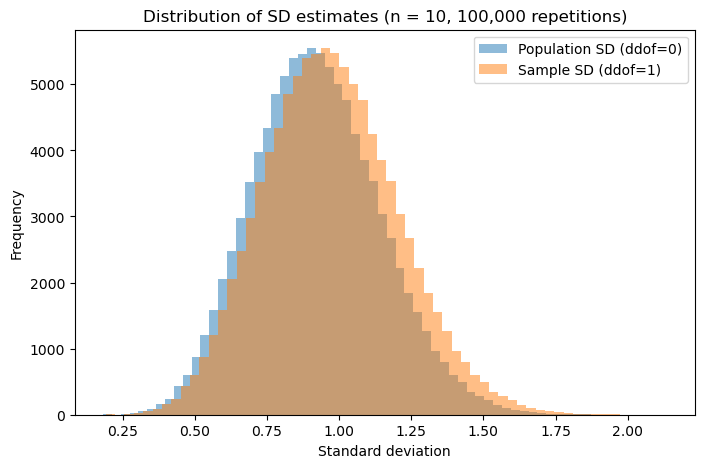

In [91]:
plt.figure(figsize=(8,5))

plt.hist(sd_ddof0, bins=60, alpha=0.5, label="Population SD (ddof=0)")
plt.hist(sd_ddof1, bins=60, alpha=0.5, label="Sample SD (ddof=1)")

plt.title("Distribution of SD estimates (n = 10, 100,000 repetitions)")
plt.xlabel("Standard deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Discussion

The histogram shows that the two distributions of standard deviations are similar in shape, but not identical.

- The **population SD (ddof=0)** is slightly shifted to the **left**.  
  This makes sense because dividing by *n* tends to **underestimate** the true standard deviation when the sample is small.

- The **sample SD (ddof=1)** is shifted a bit to the **right**.  
  Using *n–1* instead of *n* corrects the bias, so the sample SD tends to be slightly larger and closer to the true value of 1.

With a sample size of only 10, this difference is noticeable.

### What happens if the sample size increases?

If we repeat the simulation with larger samples (e.g., n = 50, n = 200):

- The two histograms will move closer together  
- Both estimators become more concentrated around 1  
- The bias of the ddof=0 estimator becomes much smaller  
- Variability decreases because larger samples give more stable estimates

In other words:

**As sample size increases, the difference between ddof=0 and ddof=1 becomes negligible.**


******************************

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

## Problem 3 — Type II Error and t-Tests

**Objective:**  
Simulate the behavior of Type II errors in t-tests as the difference between population means increases.

**Key Concepts:**  
- Type I and Type II errors  
- Power of a statistical test  
- The relationship between effect size and error rates

**Steps:**  
1. Define a range of true mean differences (d = 0 to 1).  
2. Generate two samples for each d.  
3. Perform an independent t-test.  
4. Record how often the null hypothesis is not rejected.  
5. Plot the Type II error rate as a function of d.  
6. Discuss how power increases with effect size.

## Problem 4 — ANOVA vs Multiple t-Tests

**Objective:**  
Compare results from one-way ANOVA with results from multiple two-sample t-tests when analyzing group mean differences.

**Key Concepts:**  
- ANOVA as an omnibus test  
- Multiple comparisons problem  
- Controlling Type I error (family-wise error rate)

**Steps:**  
1. Generate three independent samples from normal distributions with different means.  
2. Run a one-way ANOVA.  
3. Perform pairwise t-tests (with and without correction).  
4. Compare results and conclusions.  
5. Explain why ANOVA is preferred before multiple t-tests.
